### <center> Часть №1. Сумма числового ряда. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 12,8

%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time

list_of_members1 = []
n = 1
for k in range(0, 10000):
    list_of_members1.append(((-1)**(k))*(2*k+1)/(n))
    n *= 2

Wall time: 12 ms


In [3]:
%%time

partial_sum_list = []
for member in range(0, len(list_of_members1)):
    partial_sum_list.append(sum(list_of_members1[:member]))

Wall time: 1.19 s


In [4]:
series_sum1 = sum(list_of_members1)

In [5]:
series_sum1_reversed = sum(list_of_members1[::-1])

In [6]:
series_sum1, series_sum1_reversed, series_sum1 - series_sum1_reversed

(0.22222222222222215, 0.22222222222222215, 0.0)

In [7]:
series_sum1 - 2/9, series_sum1_reversed - 2/9

(-5.551115123125783e-17, -5.551115123125783e-17)

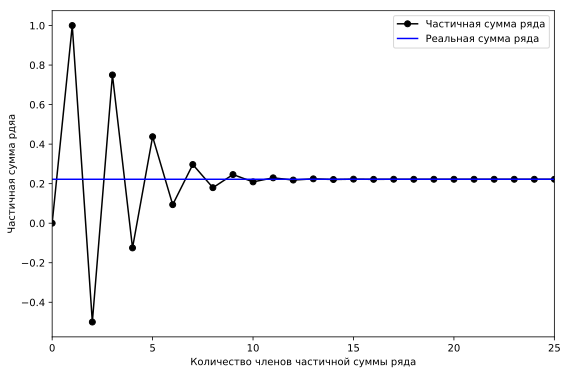

In [8]:
x = np.linspace(0, len(partial_sum_list), len(partial_sum_list))
plt.figure(figsize=(9,6))
plt.plot(x, partial_sum_list, marker='o', color='black', markersize=6)
plt.axhline(2/9, color='b')
plt.xlim(0, 25)
plt.ylabel('Частичная сумма рдяа')
plt.xlabel('Количество членов частичной суммы ряда')
plt.legend(['Частичная сумма ряда', 'Реальная сумма ряда'])

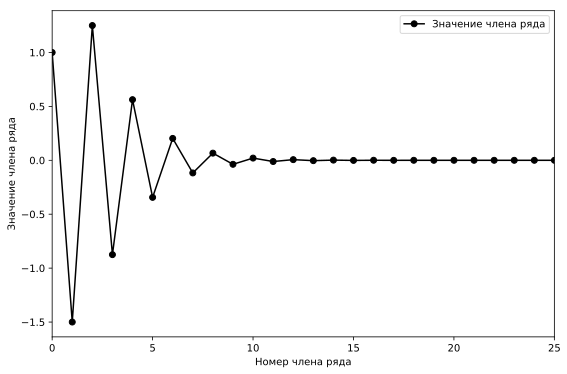

In [9]:
x = np.linspace(0, len(list_of_members1), len(list_of_members1))
plt.figure(figsize=(9,6))
plt.plot(x, list_of_members1, marker='o', color='black', markersize=6)
plt.xlim(0, 25)
plt.ylabel('Значение члена ряда')
plt.xlabel('Номер члена ряда')
plt.legend(['Значение члена ряда'])

### <center> Часть №2. Численное интегрирование методом трапеции.

In [10]:
from scipy import integrate

**Для начала будет использовать метод трапеций.**

**Формула трапеций: $$ J = \frac{1}{2} \sum_{n=0}^{N-1} h_n(f_{n+1} + f_{n}) $$**

**Теперь напишем функцию, основа которой будет метод трапеций.**

In [84]:
def method_of_trapezoids(integrand, a, b, number):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций,
    а также точное решенение данного интеграла и ошибку измерения.
    integrand - подынтегральная функция
    a, b - пределы интегрирования
    number - количество частичных отрезков
    """
    approximate_solution_list = []
    step = float(b - a)/number
    approximate_solution = 0.5*(integrand(a) + integrand(b))
    approximate_solution_list.append(approximate_solution)
    
    for i in range(1, number):
        approximate_solution += integrand(a + i*step)
        approximate_solution_list.append(integrand(a + i*step))
    approximate_solution *= step

    exact_solution = integrate.quad(integrand, a, b)[0]

    error = approximate_solution - exact_solution
    return print(
                'Приближенное решение: {}, Точное решение: {}, Ошибка измерения: {}, Koличество частичных отрезков: {}'
                 .format(approximate_solution, exact_solution, abs(error), number)
                ),\
                  approximate_solution_list, abs(error)

In [85]:
integrand = lambda x: x*np.sin(x)

In [86]:
solution1 = method_of_trapezoids(integrand, 0, np.pi, 10)

Приближенное решение: 3.1157114868310707, Точное решение: 3.141592653589793, Ошибка измерения: 0.02588116675872243, Koличество частичных отрезков: 10


In [87]:
solution2 = method_of_trapezoids(integrand, 0, np.pi, 100)

Приближенное решение: 3.1413342637004185, Точное решение: 3.141592653589793, Ошибка измерения: 0.000258389889374655, Koличество частичных отрезков: 100


In [88]:
solution3 = method_of_trapezoids(integrand, 0, np.pi, 10000)

Приближенное решение: 3.141592627751224, Точное решение: 3.141592653589793, Ошибка измерения: 2.5838569062131e-08, Koличество частичных отрезков: 10000


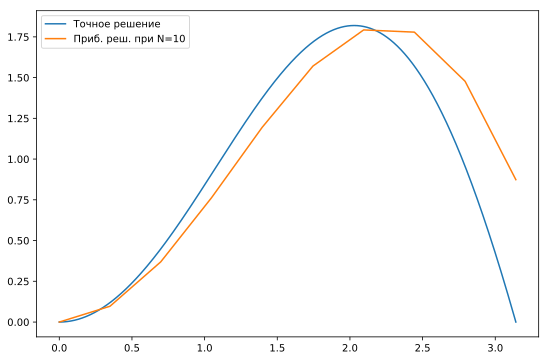

In [89]:
x0 = np.linspace(0, np.pi, 100000)
plt.figure(figsize=(9,6))

x1 = np.linspace(0, np.pi, 10)
plt.plot(x0, integrand(x0), x1, solution1[1])
plt.legend(['Точное решение', 'Приб. реш. при N=10'])

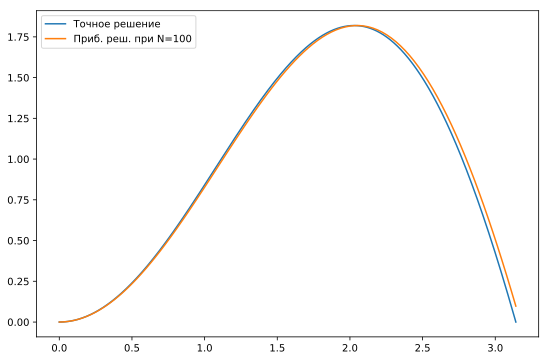

In [90]:
x2 = np.linspace(0, np.pi, 100)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), x2, solution2[1])
plt.legend(['Точное решение', 'Приб. реш. при N=100'])

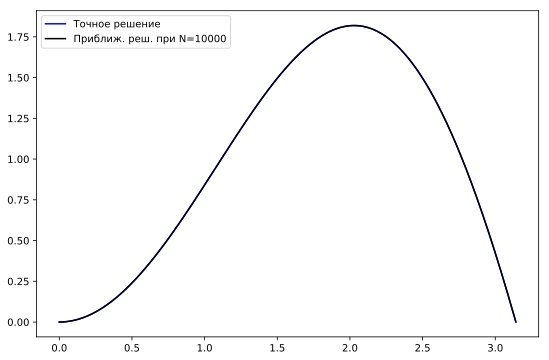

In [91]:
x3 = np.linspace(0, np.pi, 10000)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), color = 'blue')
plt.plot(x3, solution3[1], color='black')
plt.legend(['Точное решение', 'Приближ. реш. при N=10000'])

### <center> Часть №3. Численное интегрирование методом Симпсона.

**Формула Симпсона:** $$ J = \frac{1}{6} \sum_{n=0}^{N-1} h_n(f_n + 4f_{n+1/2}+f_{n+1}) $$

**Теперь напишем функцию, основа которой будет метод Симпсона.**

In [161]:
def method_of_simpson(integrand, a, b, dubn):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций,
    а также точное решенение данного интеграла и ошибку измерения.
    integrand - подынтегральная функция
    a, b - пределы интегрирования
    dubn - количество частичных отрезков
    """
    approximate_solution_list = []
    step = float(b - a)/dubn
    approximate_solution = integrand(a) + integrand(b)
    approximate_solution_list.append(approximate_solution)
    
    x1 = a + step 
    x2 = a + 2*step
    for i in range(1, dubn+1):
        if (i//2)*2 == i:
            approximate_solution += 4*integrand(x1)
            approximate_solution_list.append(integrand(x1))
            x1 += 2*step
        else:
            approximate_solution += 2*integrand(x2)
            approximate_solution_list.append(integrand(x2))
            x2 += 2*step
            
    approximate_solution *= step/3
    exact_solution = integrate.quad(integrand, a, b)[0]

    error = approximate_solution - exact_solution
    return print(
                'Приближенное решение: {}, Точное решение: {}, Ошибка приближения: {}, Koличество частичных отрезков: {}'
                 .format(approximate_solution, exact_solution, abs(error), dubn)
                ),\
                  approximate_solution_list, abs(error)

In [162]:
simpson_sol1 = method_of_simpson(lambda x: x*np.sin(x), 0, np.pi, 10)

Приближенное решение: 3.1417646829859223, Точное решение: 3.141592653589793, Ошибка приближения: 0.00017202939612914747, Koличество частичных отрезков: 10


In [163]:
simpson_sol2 = method_of_simpson(lambda x: x*np.sin(x), 0, np.pi, 100)

Приближенное решение: 3.1415926705928814, Точное решение: 3.141592653589793, Ошибка приближения: 1.7003088270683975e-08, Koличество частичных отрезков: 100


In [164]:
simpson_sol3 = method_of_simpson(lambda x: x*np.sin(x), 0, np.pi, 10000)

Приближенное решение: 3.141592653589654, Точное решение: 3.141592653589793, Ошибка приближения: 1.389999226830696e-13, Koличество частичных отрезков: 10000


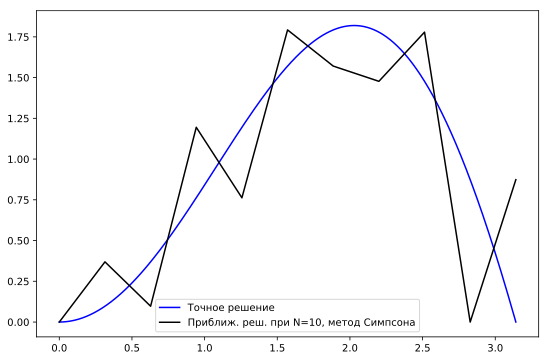

In [165]:
x1 = np.linspace(0, np.pi, 11)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), color = 'blue')
plt.plot(x1, simpson_sol1[1], color='black')
plt.legend(['Точное решение', 'Приближ. реш. при N=10, метод Симпсона'])

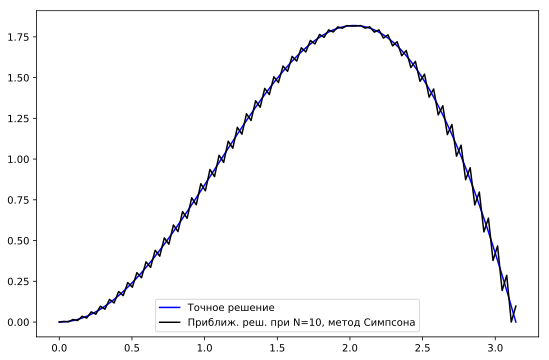

In [166]:
x2 = np.linspace(0, np.pi, 101)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), color = 'blue')
plt.plot(x2, simpson_sol2[1], color='black')
plt.legend(['Точное решение', 'Приближ. реш. при N=10, метод Симпсона'])

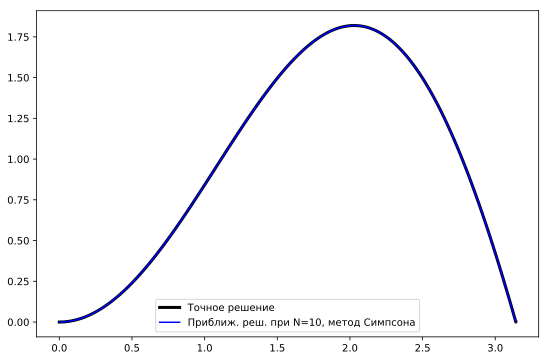

In [169]:
x3 = np.linspace(0, np.pi, 10001)
plt.figure(figsize=(9,6))

plt.plot(x3, simpson_sol3[1], color='black', linewidth=3)
plt.plot(x0, integrand(x0), color = 'blue')
plt.legend(['Точное решение', 'Приближ. реш. при N=10, метод Симпсона'])

In [170]:
! jupyter nbconvert --to html Chisl1.ipynb

[NbConvertApp] Converting notebook Chisl1.ipynb to html
[NbConvertApp] Writing 666156 bytes to Chisl1.html
